In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv("C:\\Users\\Sudha\\Downloads\\clustering_data.csv")
df.head()

C:\Users\Sudha\AppData\Local\Temp\ipykernel_11392\2177475059.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Sudha\\Downloads\\clustering_data.csv")


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [17]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop any rows with NaN values if they exist
df = df.dropna(subset=['Latitude', 'Longitude'])

In [18]:
filtered_df = df[df['CircleName'].str.contains('Bihar', case=False)]
filtered_df.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
33,Bihar Circle,"East Region, Bhagalpur",Bhagalpur Division,Kathrang BO,813105,BO,Delivery,BANKA,BIHAR,84.527000,24.239000
34,Bihar Circle,"East Region, Bhagalpur",Bhagalpur Division,Mohiuddivpur BO,813105,BO,Delivery,BHAGALPUR,BIHAR,84.529000,24.235400
35,Bihar Circle,"East Region, Bhagalpur",Bhagalpur Division,Sanjha BO,813105,BO,Delivery,BANKA,BIHAR,84.523670,24.236500
36,Bihar Circle,"East Region, Bhagalpur",Bhagalpur Division,Singhnan BO,813105,BO,Delivery,BANKA,BIHAR,84.535000,24.223600
37,Bihar Circle,"East Region, Bhagalpur",Bhagalpur Division,Kasri BO,813203,BO,Delivery,BHAGALPUR,BIHAR,87.262885,25.298763


In [19]:
num_rows, num_cols = filtered_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 9066
Number of columns: 11


In [20]:
print(filtered_df['Latitude'].dtype)
print(filtered_df['Longitude'].dtype)

float64
float64


In [21]:
import matplotlib.pyplot as plt

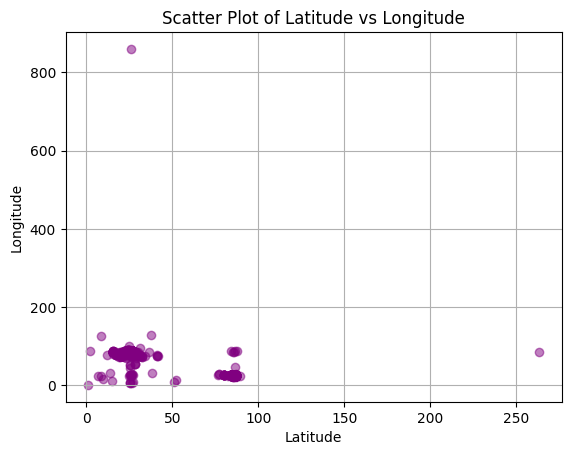

In [22]:
x_axis = filtered_df['Latitude']
y_axis = filtered_df['Longitude']
plt.scatter(x_axis,y_axis, marker='o', color='purple', alpha=0.5)
plt.title('Scatter Plot of Latitude vs Longitude')  
plt.xlabel('Latitude')  
plt.ylabel('Longitude')
plt.grid(True) 
plt.show()

In [23]:
def initialize_centroids(data, k):
    """ Initialize centroids by randomly selecting k data points as centroids. """
    np.random.seed(0)
    centroids_idx = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_idx]
    return centroids

In [24]:
def assign_to_clusters(data, centroids):
    """ Assign each data point to the closest centroid. """
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

In [25]:
def update_centroids(data, clusters, k):
    """ Update centroids based on the mean of data points assigned to each cluster. """
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

In [26]:
def kmeans(data, k, max_iterations=100):
    """ Perform k-means clustering on the given data with k clusters. """
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [27]:
# Extract latitude and longitude values
data = filtered_df[['Latitude', 'Longitude']].values

# Number of clusters
k = 2

# Perform k-means clustering
clusters, centroids = kmeans(data, k, max_iterations=300)
filtered_df['Cluster'] = clusters

C:\Users\Sudha\AppData\Local\Temp\ipykernel_11392\1254151770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = clusters


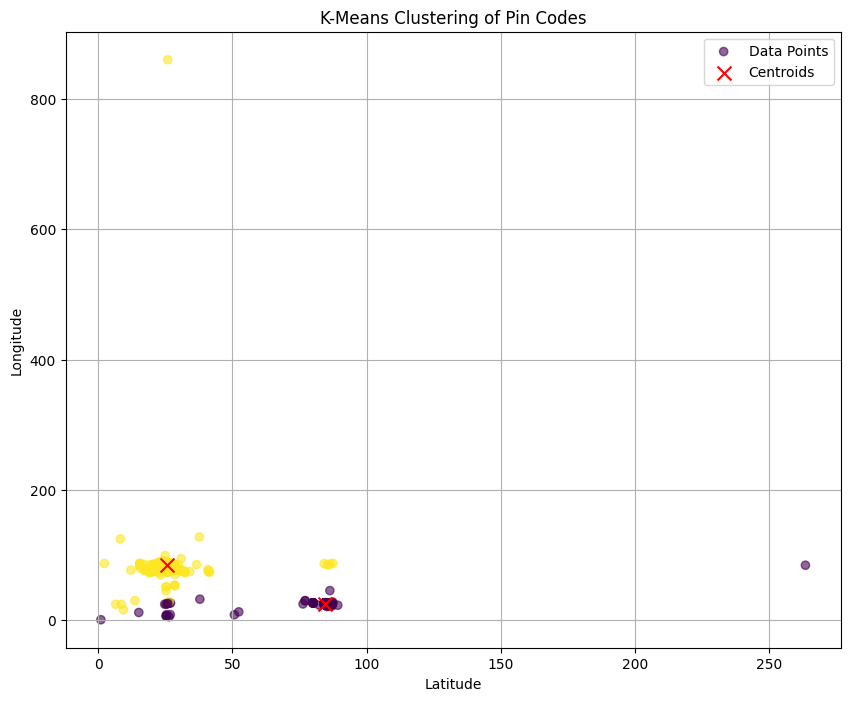

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['Latitude'], filtered_df['Longitude'], c=filtered_df['Cluster'], cmap='viridis', marker='o', alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering of Pin Codes')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
for cluster_id in range(k):
    cluster_points = filtered_df[filtered_df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f"Number of Points: {len(cluster_points)}")
    print(f"Centroid: {centroids[cluster_id]}")

Cluster 0:
Number of Points: 738
Centroid: [84.66054259 25.13992605]
Cluster 1:
Number of Points: 8328
Centroid: [25.54747089 85.1265803 ]
